# Chapter 3: ニューラルネットワーク

目的：
- 活性化関数の役割を理解する
- パーセプトロンを連結してニューラルネットを構成する
- NumPyの行列計算で順伝播を実装する

MEMO：
・パーセプトロンが単層で線形分離しかできないのに対して、ニューラルネットワークは多層構造で非線形変換を重ねられるため、微分可能


In [10]:
import sys
import numpy as np
import matplotlib.pylab as plt

print("python:", sys.version.split()[0])
print("numpy:", np.__version__)
print("matplotlib:", plt.__version__)

python: 3.11.9
numpy: 2.4.1
matplotlib: 2.4.1


### 活性化関数/Step・Sigmoid・LeRU

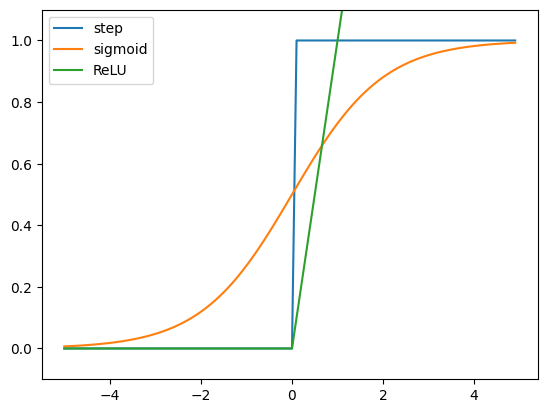

In [11]:
def step_function(x):
    return np.array(x > 0, dtype=int) 
    # x > 0 は True / False の配列のため、dtype=np.int で int 型に変換

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)
    # x と 0 を比較し、大きい方を返す

x = np.arange(-5.0, 5.0, 0.1)
y_step = step_function(x)
y_sigmoid = sigmoid(x)
y_rulu = relu(x)

plt.plot(x, y_step, label="step")
plt.plot(x, y_sigmoid, label="sigmoid")
plt.plot(x, y_rulu, label="ReLU")
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()

### 3層ニューラルネットワークの実装例

出力層の活性化関数として恒等関数を使っているため、そのまま出力される. 
init_networ:   
重みとバイアスの初期化を行い、ディクショナリ型の変数networkに格納

In [12]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = a3  # 恒等関数(入力をそのまま出力)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)        # [0.31682708 0.69627909]

[0.31682708 0.69627909]
